In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Physical constants
F = 96485        # Faraday constant (C/mol)
R = 8.314        # Gas constant (J/mol.K)

# SOFC operating parameters
T = 1073         # Temperature (K) → 800°C
E0 = 1.18        # Standard reversible voltage (V)
alpha = 0.5      # Charge transfer coefficient
i0 = 1e-3        # Exchange current density (A/cm^2)
ilim = 2.0       # Limiting current density (A/cm^2)
R_total = 0.2    # Total ohmic resistance (ohm.cm^2)

# Current density range
i = np.linspace(0.01, 1.5, 100)  # A/cm^2


In [3]:
# Reversible voltage (simplified Nernst equation)
E_rev = E0  # assuming standard pressure conditions


In [5]:
#Activation Loss
eta_act = (R * T / (alpha * F)) * np.log(i / i0)

#Ohmic Loss
eta_ohmic = i * R_total

#Concentration Loss
eta_conc = -(R * T / (2 * F)) * np.log(1 - i / ilim)


In [6]:
#Actual SOFC voltage
V_cell = E_rev - (eta_act + eta_ohmic + eta_conc)


In [7]:
#Power Density
power_density = V_cell * i  # W/cm^2


In [8]:
#Electrical Density
E_thermoneutral = 1.48  # Thermoneutral voltage for H2 (V)
efficiency = V_cell / E_thermoneutral


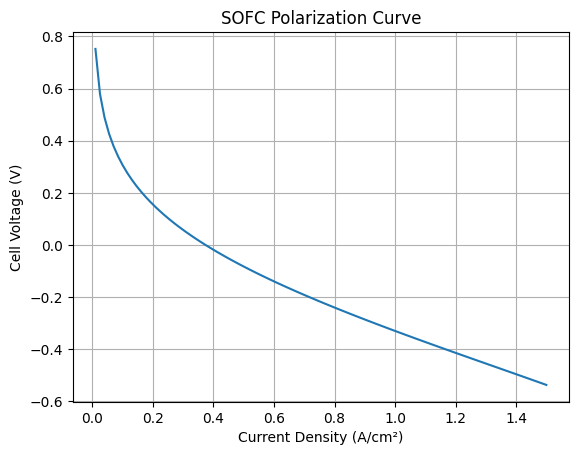

In [9]:
#Polarizarion curve
plt.figure()
plt.plot(i, V_cell)
plt.xlabel("Current Density (A/cm²)")
plt.ylabel("Cell Voltage (V)")
plt.title("SOFC Polarization Curve")
plt.grid()
plt.show()


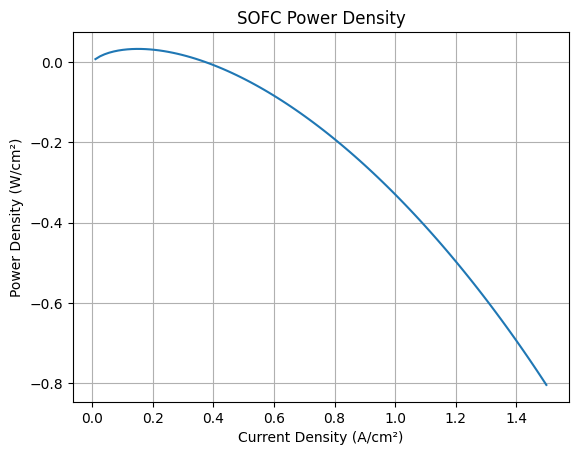

In [10]:
#Power Density Curve
plt.figure()
plt.plot(i, power_density)
plt.xlabel("Current Density (A/cm²)")
plt.ylabel("Power Density (W/cm²)")
plt.title("SOFC Power Density")
plt.grid()
plt.show()


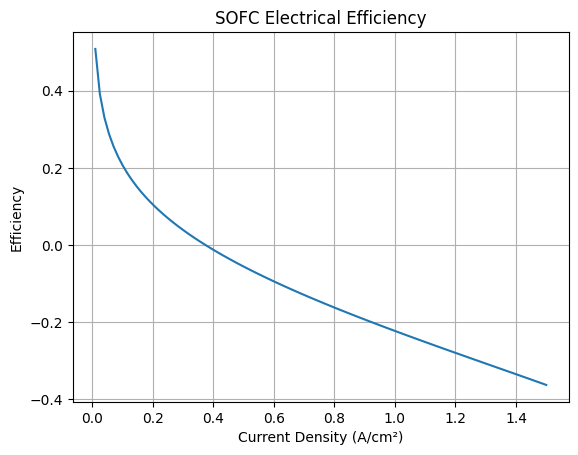

In [11]:
#Efficiency curve
plt.figure()
plt.plot(i, efficiency)
plt.xlabel("Current Density (A/cm²)")
plt.ylabel("Efficiency")
plt.title("SOFC Electrical Efficiency")
plt.grid()
plt.show()


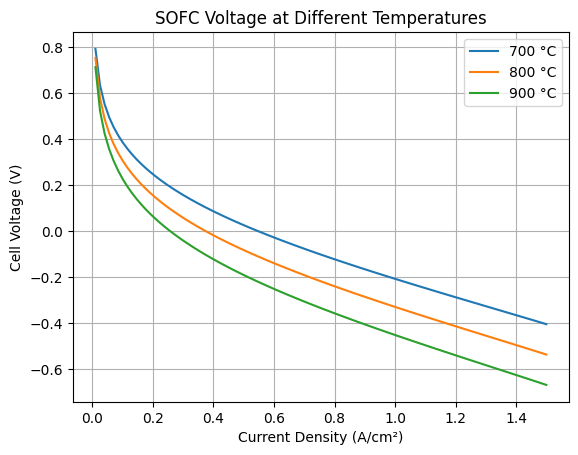

In [12]:
#Temperature Sensitivity
temperatures = [973, 1073, 1173]  # 700, 800, 900 °C

plt.figure()

for T in temperatures:
    eta_act = (R * T / (alpha * F)) * np.log(i / i0)
    eta_ohmic = i * R_total
    eta_conc = -(R * T / (2 * F)) * np.log(1 - i / ilim)
    V_cell = E0 - (eta_act + eta_ohmic + eta_conc)
    plt.plot(i, V_cell, label=f"{T-273} °C")

plt.xlabel("Current Density (A/cm²)")
plt.ylabel("Cell Voltage (V)")
plt.title("SOFC Voltage at Different Temperatures")
plt.legend()
plt.grid()
plt.show()


This project models a Solid Oxide Fuel Cell (SOFC) using Python.
Electrochemical losses, power density, efficiency, and temperature
effects were analyzed to identify optimal operating conditions.

Key Findings:
- Voltage decreases with increasing current density due to losses
- Power density shows a peak at intermediate current densities
- Higher temperatures improve performance but may impact durability

Applications:
- Fuel cell stack design
- High-temperature energy systems
- Combined heat and power (CHP) analysis
